In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filecoin_messages_filrep_subset_expanded.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9249 entries, 0 to 9248
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                9249 non-null   object 
 1   account             9249 non-null   object 
 2   address             9249 non-null   object 
 3   type                9249 non-null   object 
 4   id                  9249 non-null   int64  
 5   name                4943 non-null   object 
 6   overEstimationBurn  9249 non-null   float64
 7   refundDecimal       9249 non-null   float64
 8   refund              9249 non-null   float64
 9   amountDecimal       9249 non-null   float64
 10  burnedDecimal       9249 non-null   float64
 11  signature           0 non-null      float64
 12  signedHash          0 non-null      float64
 13  success             9249 non-null   bool   
 14  minerPenalty        9249 non-null   float64
 15  minerTip            9249 non-null   float64
 16  exitCo

In [3]:
import pandas as pd


grouped = df.drop(['date', 'address', 'type', 'name', 'signature', 'signedHash'], axis=1).groupby('account')

# Create dummy columns for 'exitCode' and 'success', and find their count
dummy_columns = pd.get_dummies(df[['exitCode', 'success','id']], columns=['exitCode', 'success','id'])
dummy_counts = dummy_columns.groupby(df['account']).sum()

# Calculate the average of other columns
averages = grouped.mean()

# Merge dummy counts with averages
result = pd.concat([averages, dummy_counts], axis=1)
result.drop(columns=['id', 'success', 'exitCode'],inplace=True)

print(result)
result.to_csv()


           overEstimationBurn  refundDecimal    refund  amountDecimal  \
account                                                                 
f01096727            0.000072       0.023406  0.023406       0.000000   
f01136409            0.000143       0.041617  0.041617       0.022782   
f0115238             0.000081       0.027695  0.027695       0.000000   
f0116445             0.000841       1.708149  1.708149       0.000000   
f0117318             0.000306       0.104299  0.104299       0.000000   
f01399784            0.000071       0.025172  0.025172       0.302525   
f01437863            0.000071       0.025139  0.025139       0.002589   
f01501611            0.000414       0.113448  0.113448       0.015277   
f015747              0.000076       0.027045  0.027045       0.000000   
f01690871            0.000009       0.014892  0.014892       5.750000   
f01812283            0.000063       0.024063  0.024063       0.010129   
f02072747            0.000277       0.084251  0.084

'account,overEstimationBurn,refundDecimal,refund,amountDecimal,burnedDecimal,minerPenalty,minerTip,gas,baseFeeBurn,exitCode_0,exitCode_6,exitCode_7,exitCode_16,success_False,success_True,id_0,id_3,id_4,id_5,id_6,id_7,id_8,id_9,id_11,id_16,id_18,id_23,id_25\r\nf01096727,7.199239744292922e-05,0.023405720589658983,0.023405720589659,0.0,0.0021263511825699503,0.0,1.7930321622316728e-06,11638028.68202765,0.0020543587851270264,217,0,0,0,0,217,0,0,1,211,0,0,0,0,4,0,1,0,0\r\nf01136409,0.0001433393914935339,0.04161667114913943,0.041616671149139445,0.022782073521564163,0.004649669123185639,0.0,3.0178981293753417e-06,22610622.27819549,0.004506329731692088,266,0,0,0,0,266,0,0,2,233,12,7,2,2,6,0,2,0,0\r\nf0115238,8.082569402896933e-05,0.027695291203545226,0.027695291203545244,0.0,0.002389671507958636,0.0,1.5688194879856232e-06,11150715.192307692,0.0023088458139296597,260,0,0,0,0,260,0,0,0,254,0,0,1,1,1,1,2,0,0\r\nf0116445,0.000841476697378517,1.7081487978744263,1.7081487978744263,0.0,0.0243117890566

In [4]:
result.columns

Index(['overEstimationBurn', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'minerPenalty', 'minerTip', 'gas', 'baseFeeBurn',
       'exitCode_0', 'exitCode_6', 'exitCode_7', 'exitCode_16',
       'success_False', 'success_True', 'id_0', 'id_3', 'id_4', 'id_5', 'id_6',
       'id_7', 'id_8', 'id_9', 'id_11', 'id_16', 'id_18', 'id_23', 'id_25'],
      dtype='object')

In [5]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filrepalgoresults.csv")

In [6]:
df1 = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filrepalgoresults.csv")

In [7]:
df1.columns

Index(['account', 'count', 'clusters', ' dealsuccesspredictor', 'filrepscore'], dtype='object')

In [8]:
merged_df = pd.merge(result, df1[['account', 'clusters']], on='account', how='right')

In [9]:
merged_df.columns

Index(['account', 'overEstimationBurn', 'refundDecimal', 'refund',
       'amountDecimal', 'burnedDecimal', 'minerPenalty', 'minerTip', 'gas',
       'baseFeeBurn', 'exitCode_0', 'exitCode_6', 'exitCode_7', 'exitCode_16',
       'success_False', 'success_True', 'id_0', 'id_3', 'id_4', 'id_5', 'id_6',
       'id_7', 'id_8', 'id_9', 'id_11', 'id_16', 'id_18', 'id_23', 'id_25',
       'clusters'],
      dtype='object')

In [14]:
merged_df.to_csv('results.csv')

In [11]:
merged_df.columns

Index(['account', 'overEstimationBurn', 'refundDecimal', 'refund',
       'amountDecimal', 'burnedDecimal', 'minerPenalty', 'minerTip', 'gas',
       'baseFeeBurn', 'exitCode_0', 'exitCode_6', 'exitCode_7', 'exitCode_16',
       'success_False', 'success_True', 'id_0', 'id_3', 'id_4', 'id_5', 'id_6',
       'id_7', 'id_8', 'id_9', 'id_11', 'id_16', 'id_18', 'id_23', 'id_25',
       'clusters'],
      dtype='object')

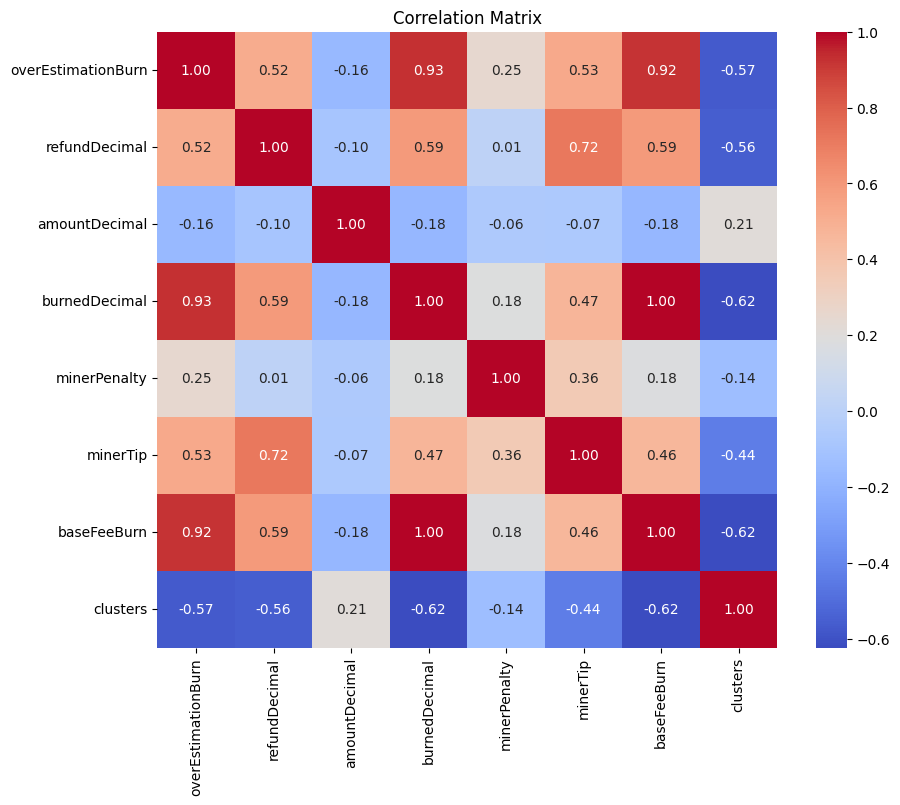

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is the DataFrame containing the merged data
selected_columns = ['overEstimationBurn', 'refundDecimal', 'amountDecimal', 
                    'burnedDecimal', 'minerPenalty', 'minerTip', 
                    'baseFeeBurn', 'clusters']

# Select the specified columns
correlation_data = merged_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()


In [16]:
df_kproto=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\full_kproto_clusters.csv")

In [17]:
df_kproto.columns

Index(['Unnamed: 0', 'method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Prototypes'],
      dtype='object')

In [20]:
df_orig=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filecoin_messages_cleaned_jan22jan24_compiled1.csv")

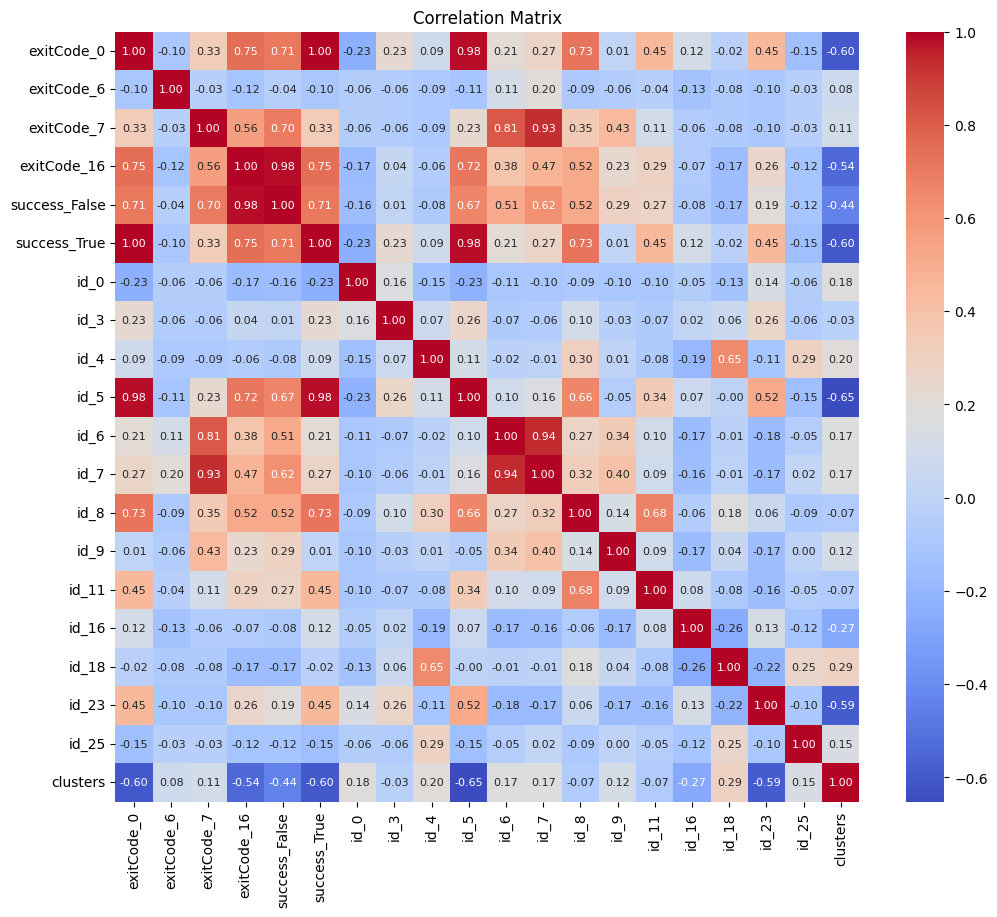

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is the DataFrame containing the merged data

# Select the specified columns
selected_columns = ['exitCode_0', 'exitCode_6', 'exitCode_7', 'exitCode_16',
                    'success_False', 'success_True', 
                    'id_0', 'id_3', 'id_4', 'id_5', 'id_6', 'id_7', 'id_8', 
                    'id_9', 'id_11', 'id_16', 'id_18', 'id_23', 'id_25', 
                    'clusters']

# Select the columns from merged_df
correlation_data = merged_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()
